### 变位词问题与复杂度
- 问题描述：
    - 所谓“变位词”是指两个词之间存在组成字母的重新排列关系。
    - 如:heart和earth，python和typhon 为了简单起见，假设参与判断的两个词仅由小写字母构成，而且长度相等。
    - 目标：写一个bool函数，以两个词作为参数，返回这两个词是否变位词
- 问题假设：
    - 字母都是小写
    - 字符串长度相等, 且都不为0

#### 方法一：逐字检查
这种办法：
    - 将长度为n的字符串逐一提取字母，并且在另外一串中搜索1->n遍，并且每一次各不相同。
    - 因此。这种算法的复杂度就是等差数列求和，也就是O(n^2)

In [72]:

def bool_check_one_by_one(s1,s2):
    # 输入这两个变量，如果互为变位词，则返回True, 否则返回False
    res = True
    l1 = list(s1)
    l2 = list(s2)
    while res:
        if len(l1) == 0:
            return res
        else: 
            if l1[0] in l2:
                l2.remove(l1[0])
                l1.remove(l1[0])
            else:
                return not res
bool_check_one_by_one('abddcde','edcaadd')       

False

#### 排序方法
使用pos表示“图灵机”检索的“字条”的位置。
if语句表示指针的状态。
- 这一种算法的主导步骤是 sort, 复杂度是O(nlog(n))。

In [71]:
def bool_sort(s1,s2):
    l1 = list(s1)
    l2 = list(s2)

    l1.sort()
    l2.sort()
    pos = 0
    matches = True
    while pos < len(s1) and matches:
        if l1[pos] == l2[pos]:
            pos = pos + 1
        else:
            matches = False
        return matches

bool_sort("saaf","aafs")

True

#### 暴力法
将所有字符提取出来做全排列，再看s2是否出现在全排列里。
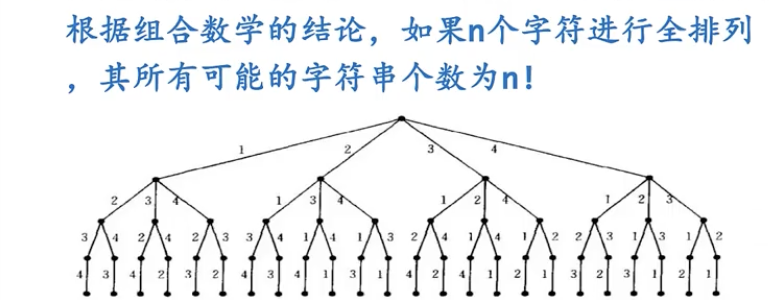

#### 计数法
方法描述：每一个字母分别计算它们出现的次数
- 总操作次数T(n) = 2n + 26 数量级为O(n)

- 但是这种方案需要更多的**存储空间**

In [77]:
def bool_count_character(s1,s2):
    c1 = [0] * 26
    c2 = [0] * 26
    for i in range(len(s1)):
        pos = ord(s1[i]) - ord('a')
        c1[pos] = c1[pos] + 1
    for i in range(len(s2)):
        pos = ord(s2[i]) - ord('a')
        c2[pos] = c2[pos] + 1
    j = 0 
    stillOK = True
    while j < 26 and stillOK:
        if c1[j] == c2[j]:
            j = j + 1
        else:
            stillOK = False
    return stillOK

print(bool_count_character('apple','pleap'))

True


In [ ]:
- 时间和空间的权衡
